In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

In [3]:
grodf = pd.read_csv('data/grocery_store_data_cleaned.csv')

In [4]:
grodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659221 entries, 0 to 659220
Data columns (total 16 columns):
Unnamed: 0           659221 non-null int64
TICKET               659221 non-null object
UNITS                659221 non-null float64
REFERENCE            659221 non-null int64
CODE                 659221 non-null float64
NAME                 659221 non-null object
UNIT_PRICEBUY        659221 non-null float64
UNIT_PRICESELL       659221 non-null float64
DATE                 659221 non-null object
PAYMENT              659221 non-null object
TRANSID              659218 non-null object
CATEGORY             659221 non-null object
TOTAL_PRICEBUY       659221 non-null float64
TOTAL_PRICESELL      659221 non-null float64
UNIT_PRICE_MARGIN    659221 non-null float64
PROFIT               659221 non-null float64
dtypes: float64(8), int64(2), object(6)
memory usage: 80.5+ MB


In [5]:
grodf.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
TICKET,d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9,d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9,f4dd518d-1fd8-4339-abc6-2c5390c20e30,aa299de6-1332-48ba-bce9-de8cbb48741e,aa299de6-1332-48ba-bce9-de8cbb48741e
UNITS,3.292,0.29,-1,3.292,1
REFERENCE,1079,2032,2032,1001,4019
CODE,1079,2032,2032,1001,8.8881e+12
NAME,Pumpkin Japanese/Kent,Orange navel,Orange navel,Australian Asparagus green,Nice Munchee 200g
UNIT_PRICEBUY,0,0,0,2,0.9
UNIT_PRICESELL,1.99,2.99,2.99,2.7,1.5
DATE,2016-03-16 23:15:39,2016-03-16 23:15:39,2016-03-16 23:17:35,2016-03-16 23:19:47,2016-03-16 23:19:47
PAYMENT,cash,cash,cashrefund,cash,cash


In [9]:
len(grodf.TICKET.unique())

181970

In [90]:
grodf.describe().loc[['mean','max']]

,Unnamed: 0,UNITS,REFERENCE,CODE,UNIT_PRICEBUY,UNIT_PRICESELL,TOTAL_PRICEBUY,TOTAL_PRICESELL,UNIT_PRICE_MARGIN,PROFIT,AMOUNT
mean,329610.0,0.904336,2133.543411,3.825417e+13,1.115888,3.972506,0.9997,2.88662,2.856619,1.886921,0.904335
max,659220.0,48.000000,9998.000000,9.188933e+16,45.000000,53.000000,138.0000,230.00000,25.000000,215.000000,48.000000


In [14]:
grodf.columns

Index(['Unnamed: 0', 'TICKET', 'UNITS', 'REFERENCE', 'CODE', 'NAME',
       'UNIT_PRICEBUY', 'UNIT_PRICESELL', 'DATE', 'PAYMENT', 'TRANSID',
       'CATEGORY', 'TOTAL_PRICEBUY', 'TOTAL_PRICESELL', 'UNIT_PRICE_MARGIN',
       'PROFIT'],
      dtype='object')

In [16]:
grodf['DATE'] = pd.to_datetime(grodf['DATE'])

In [18]:
grodf.set_index('DATE', inplace=True)

In [19]:
grodf.head()

,Unnamed: 0,TICKET,UNITS,REFERENCE,CODE,NAME,UNIT_PRICEBUY,UNIT_PRICESELL,PAYMENT,TRANSID,CATEGORY,TOTAL_PRICEBUY,TOTAL_PRICESELL,UNIT_PRICE_MARGIN,PROFIT
DATE,,,,,,,,,,,,,,,
2016-03-16 23:15:39,0,d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9,3.292,1079,1.079000e+03,Pumpkin Japanese/Kent,0.0,1.99,cash,no ID,Pumpkins,0.000,6.55108,1.99,6.55108
2016-03-16 23:15:39,1,d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9,0.290,2032,2.032000e+03,Orange navel,0.0,2.99,cash,no ID,Citrus,0.000,0.86710,2.99,0.86710
2016-03-16 23:17:35,2,f4dd518d-1fd8-4339-abc6-2c5390c20e30,-1.000,2032,2.032000e+03,Orange navel,0.0,2.99,cashrefund,NaN,Citrus,-0.000,-2.99000,2.99,-2.99000
2016-03-16 23:19:47,3,aa299de6-1332-48ba-bce9-de8cbb48741e,3.292,1001,1.001000e+03,Australian Asparagus green,2.0,2.70,cash,no ID,Bunch Vegies,6.584,8.88840,0.70,2.30440
2016-03-16 23:19:47,4,aa299de6-1332-48ba-bce9-de8cbb48741e,1.000,4019,8.888101e+12,Nice Munchee 200g,0.9,1.50,cash,no ID,Sri Lankan Groceries,0.900,1.50000,0.60,0.60000


In [91]:
prof_m_means = grodf.resample('M').mean()['PROFIT']

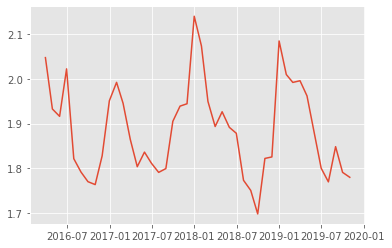

In [92]:
plt.plot(prof_m_means)

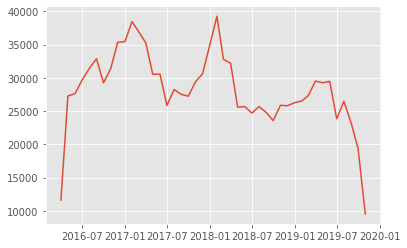

In [66]:
plt.plot(grodf.resample('M').sum()['PROFIT'])

In [100]:
cats = grodf.groupby('CATEGORY')

PLOT is too difficult to read simultaneously

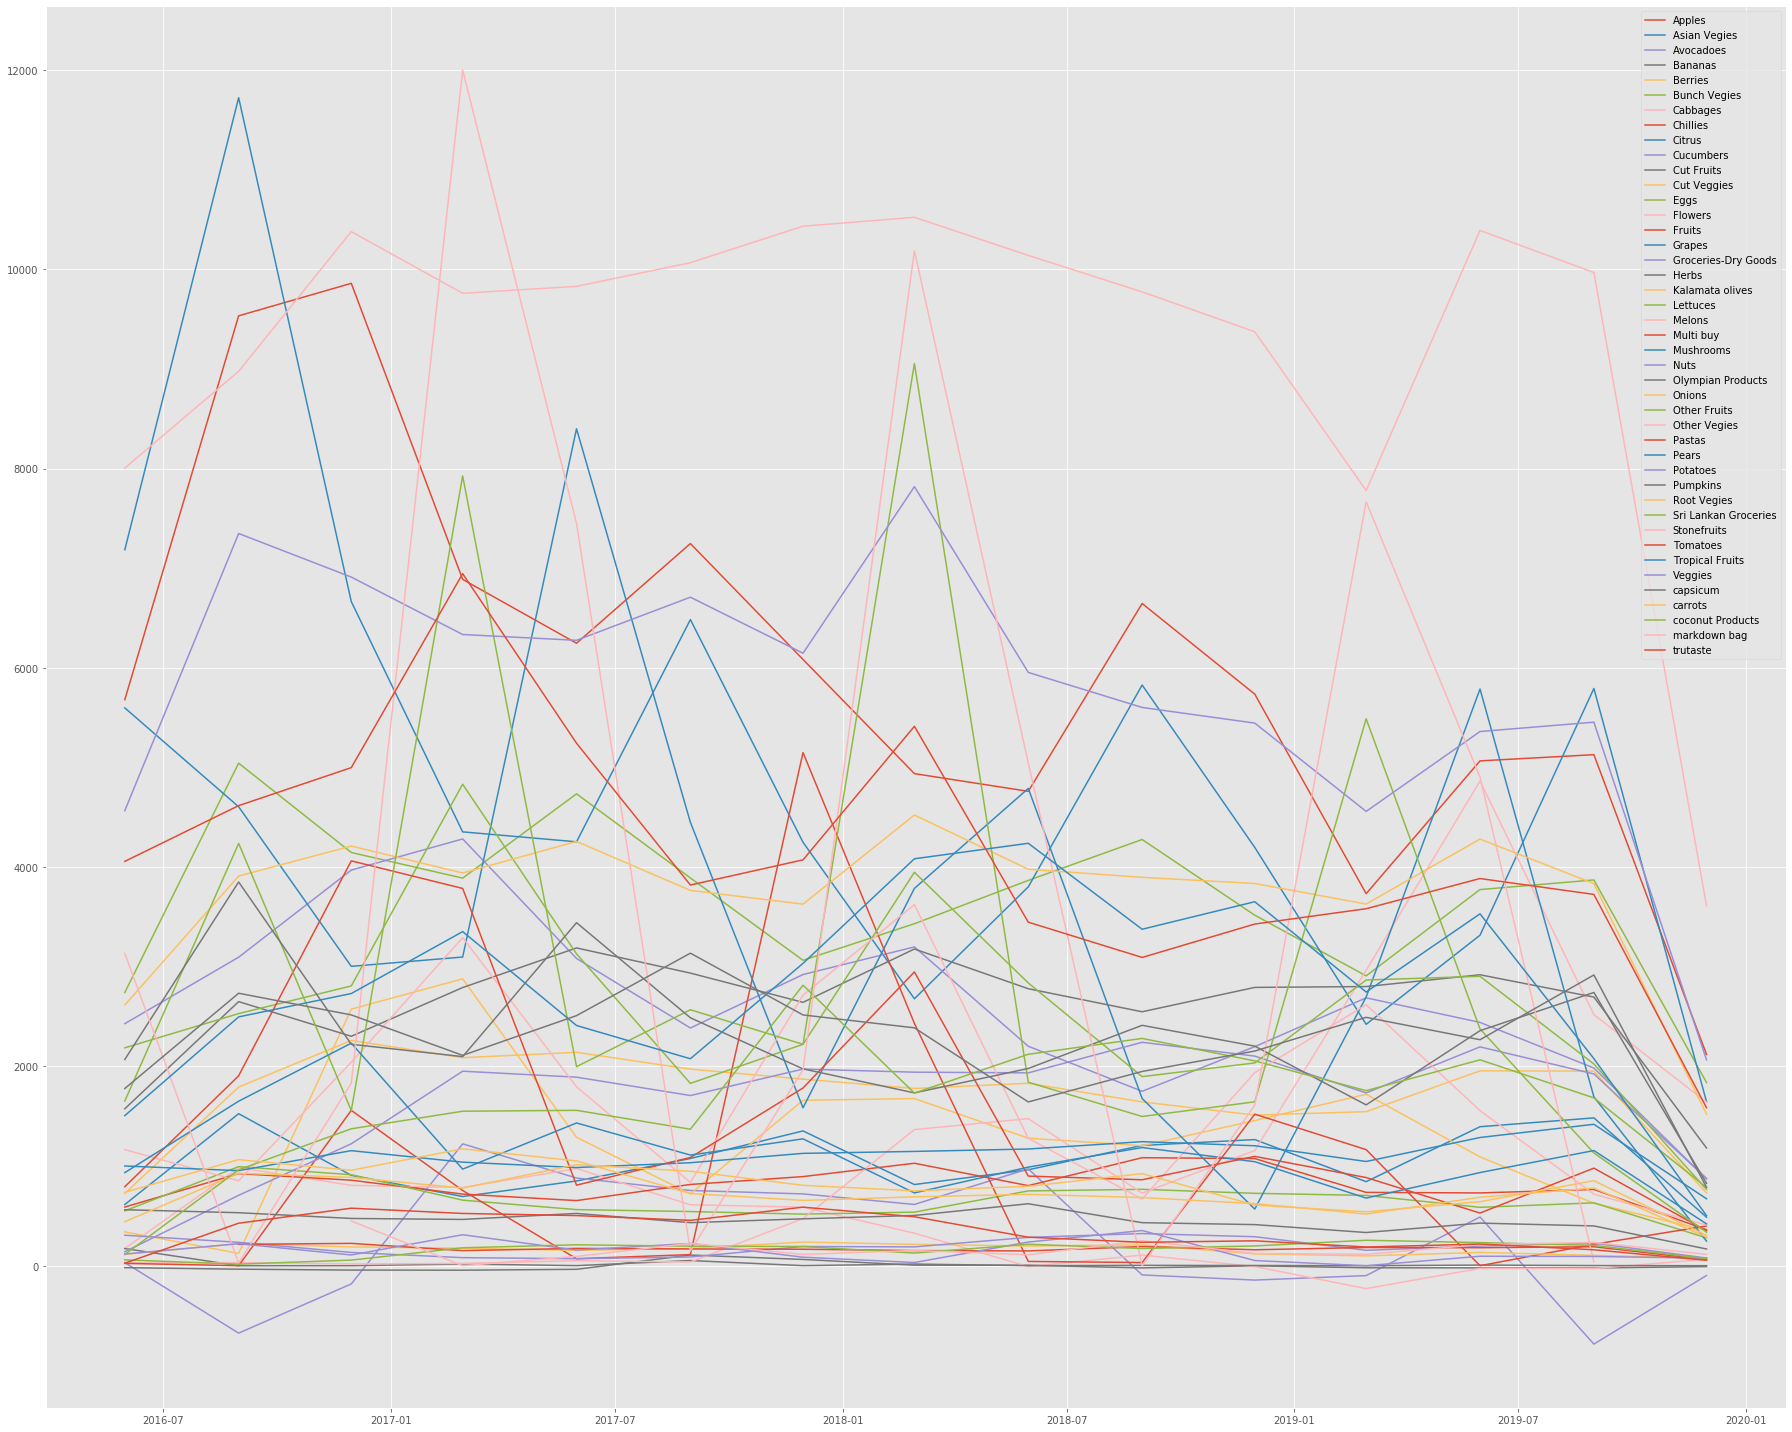

In [61]:
fig, ax = plt.subplots(figsize = (25,20))
for cat in cats:
    ax.plot(cat[1].resample('Q-NOV').sum()['PROFIT'], label = cat[0])
ax.legend()
plt.tight_layout()


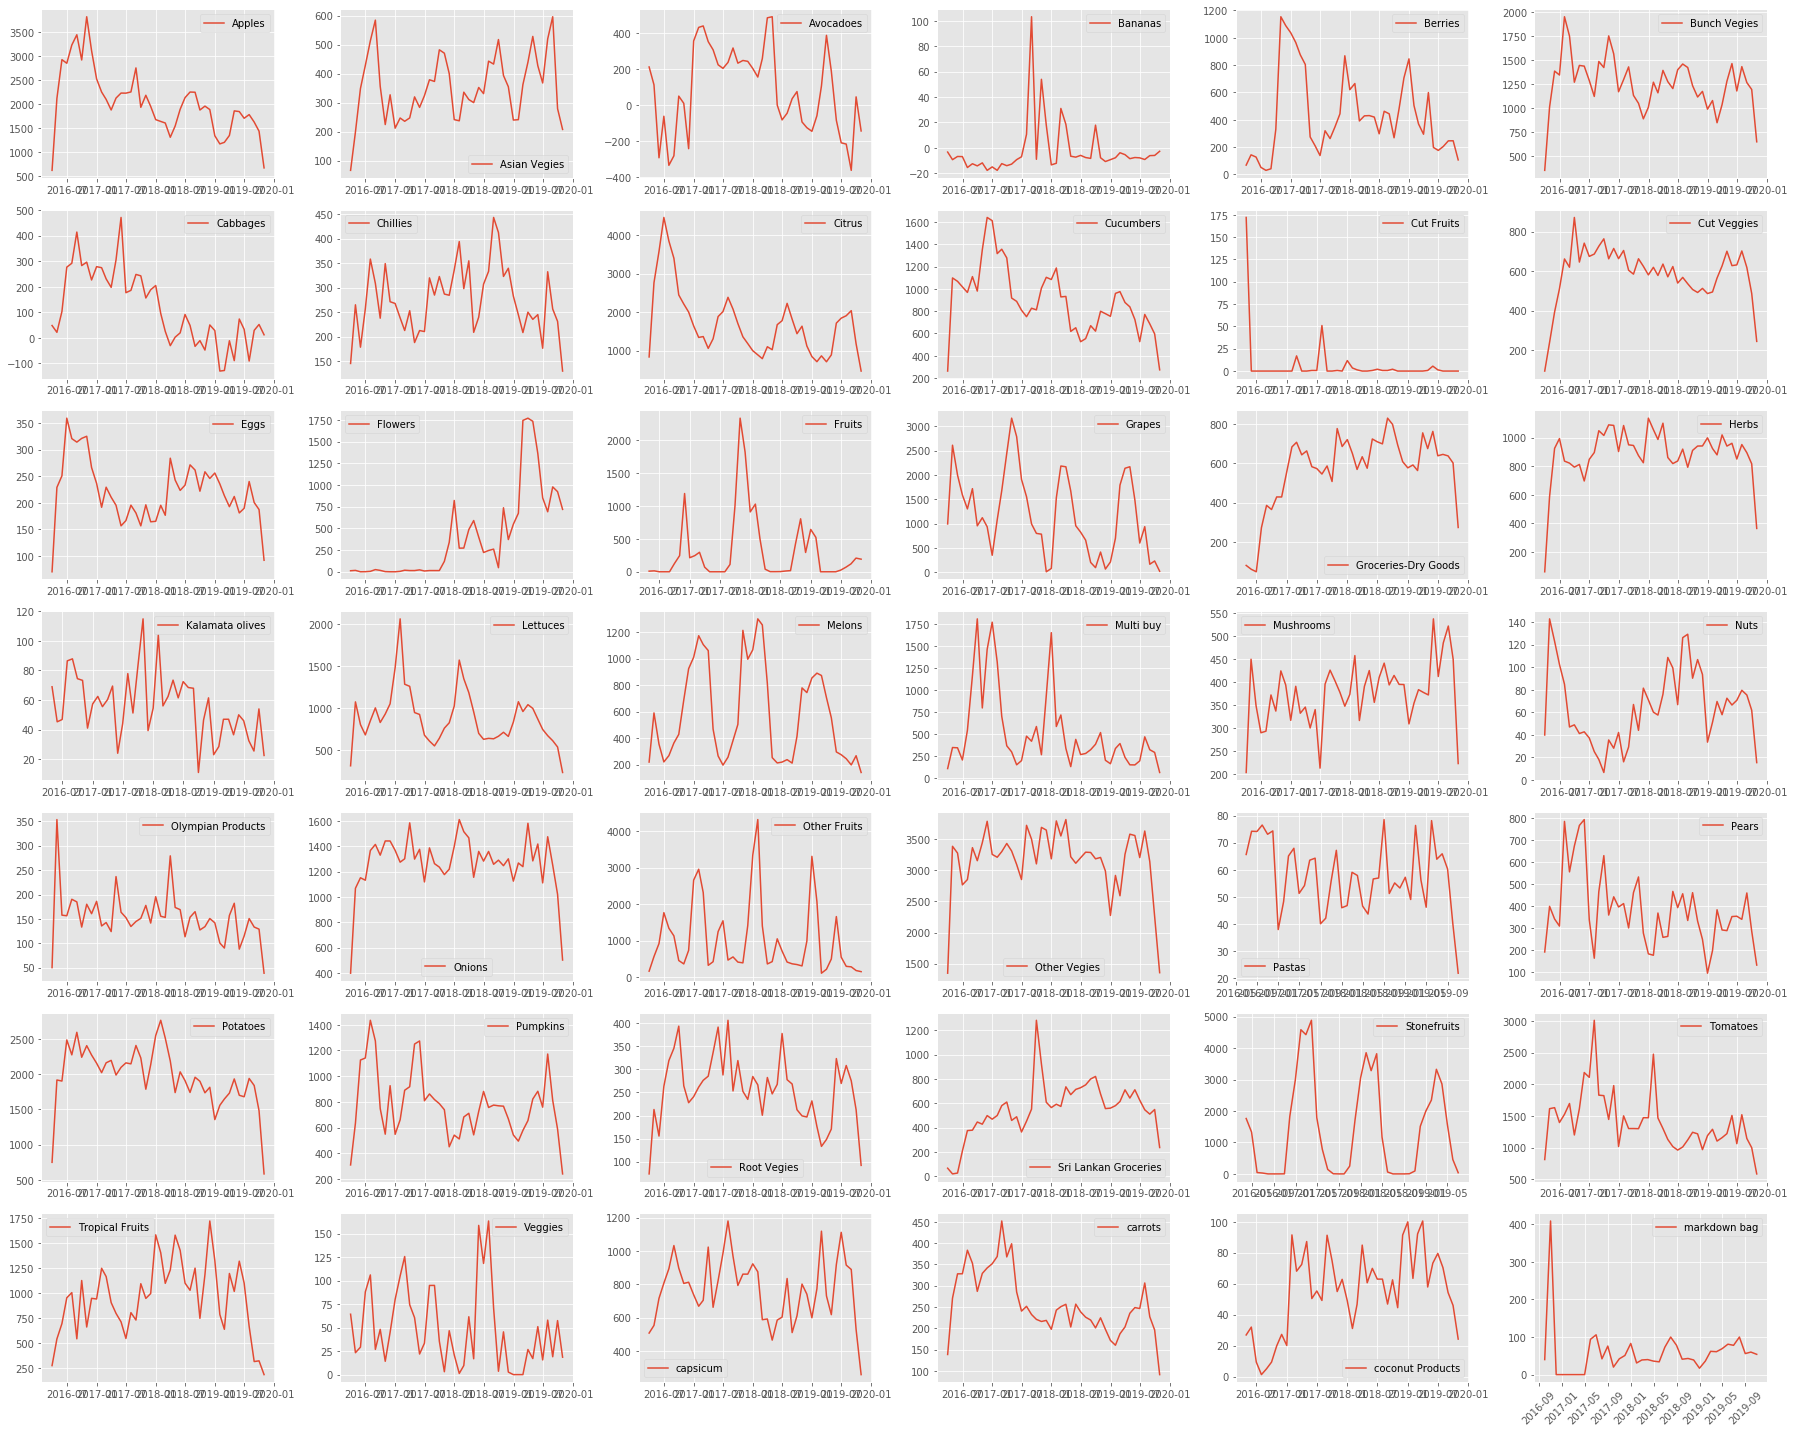

In [65]:
fig, axes = plt.subplots(7,6,figsize = (25,20))
for cat,ax in zip(cats, axes.flatten()):
    ax.plot(cat[1].resample('M').sum()['PROFIT'], label = cat[0])
    
    ax.legend()
#plt.xticks(rotation=45)
plt.tight_layout()

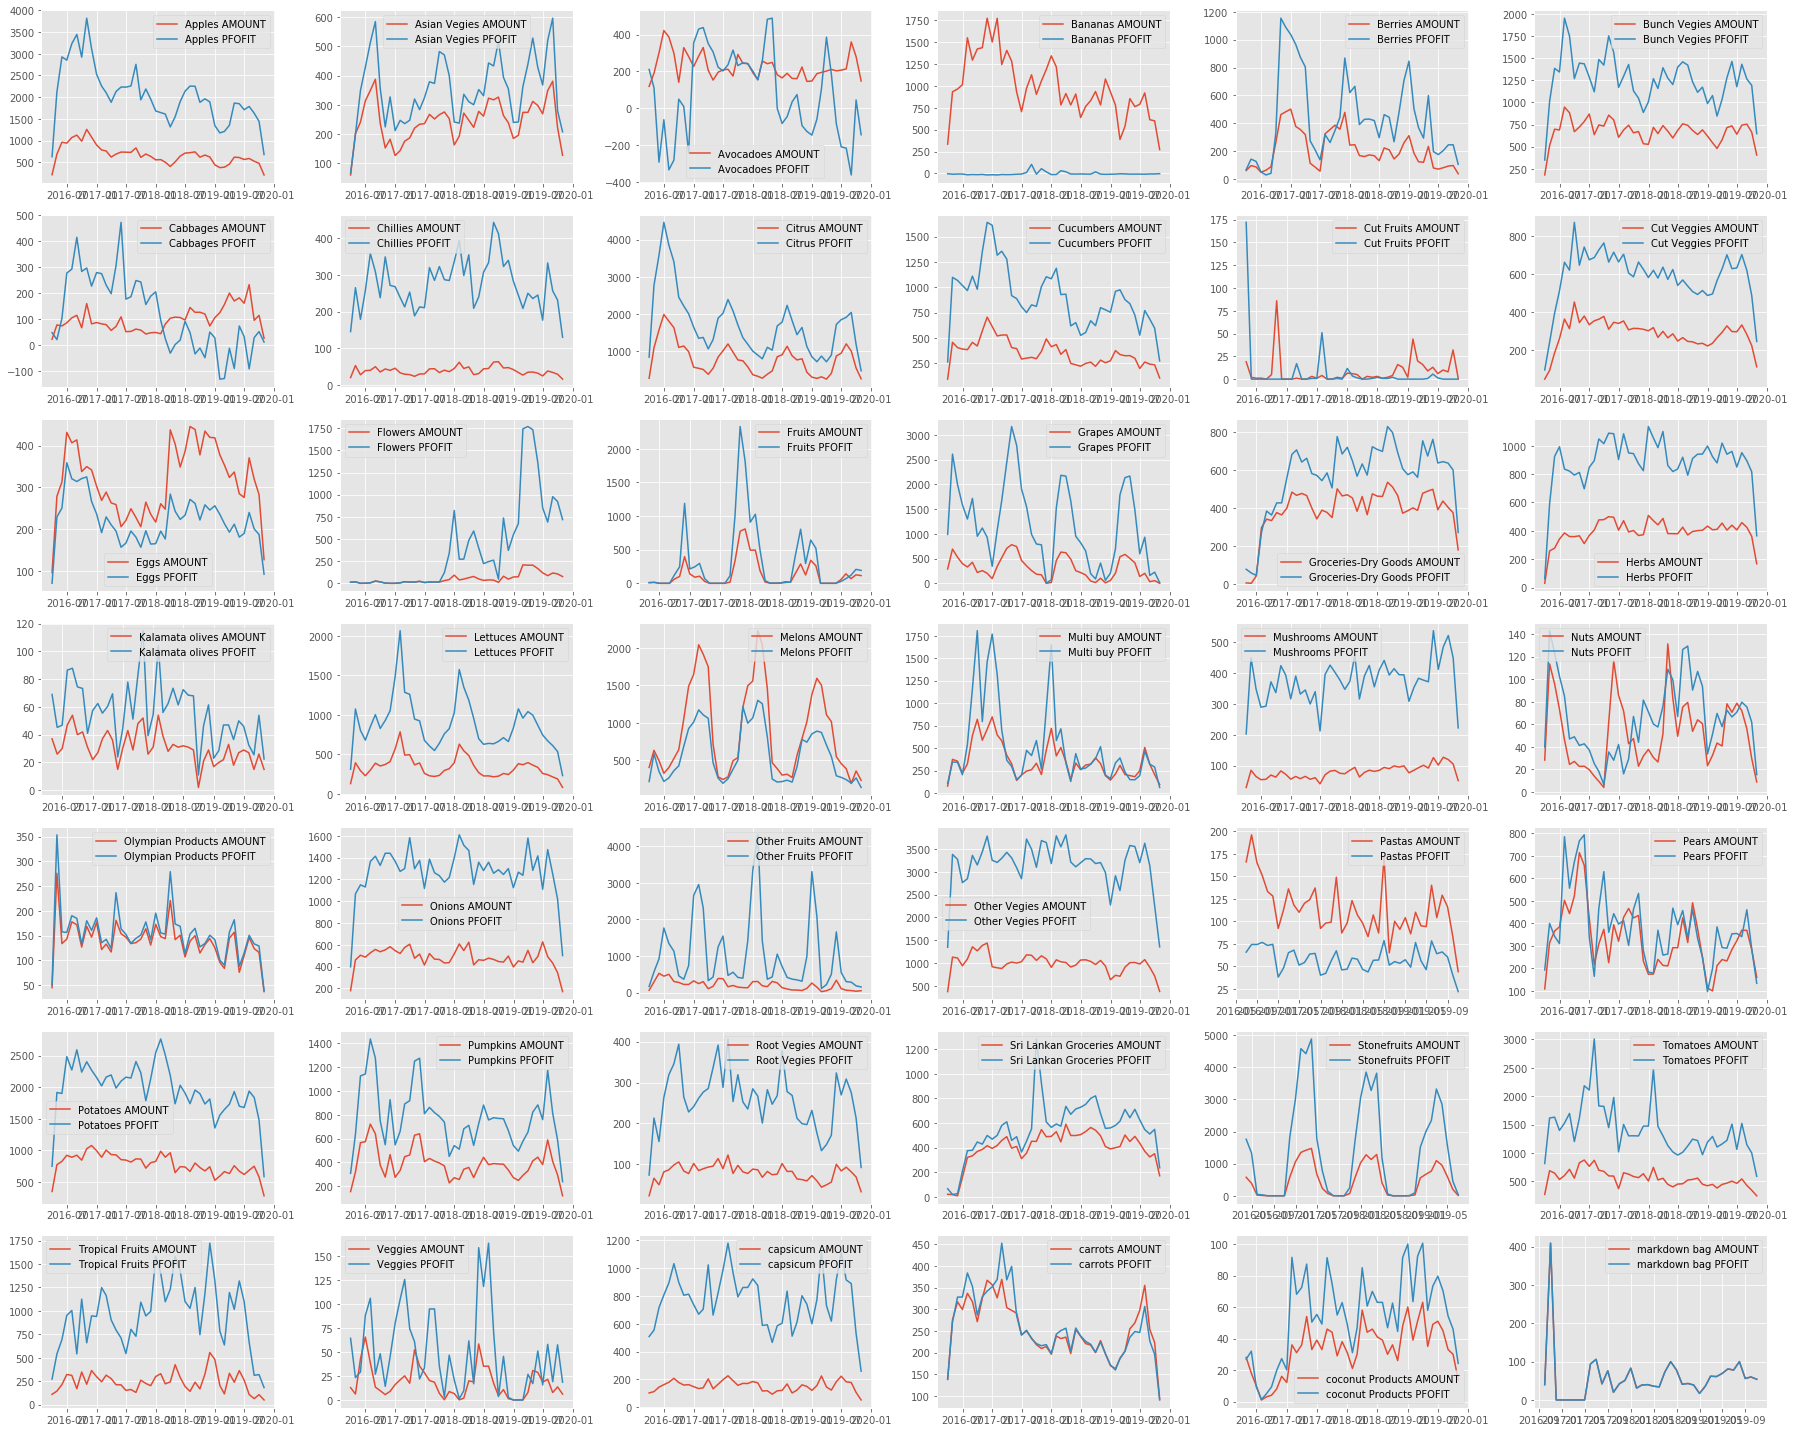

In [72]:
fig, axes = plt.subplots(7,6,figsize = (25,20))
for cat,ax in zip(cats, axes.flatten()):
    ax.plot(cat[1].resample('M').sum()['UNITS'], label = cat[0]+' AMOUNT')
    ax.plot(cat[1].resample('M').sum()['PROFIT'], label = cat[0]+' PFOFIT')
    
    ax.legend()
#plt.xticks(rotation=45)
plt.tight_layout()

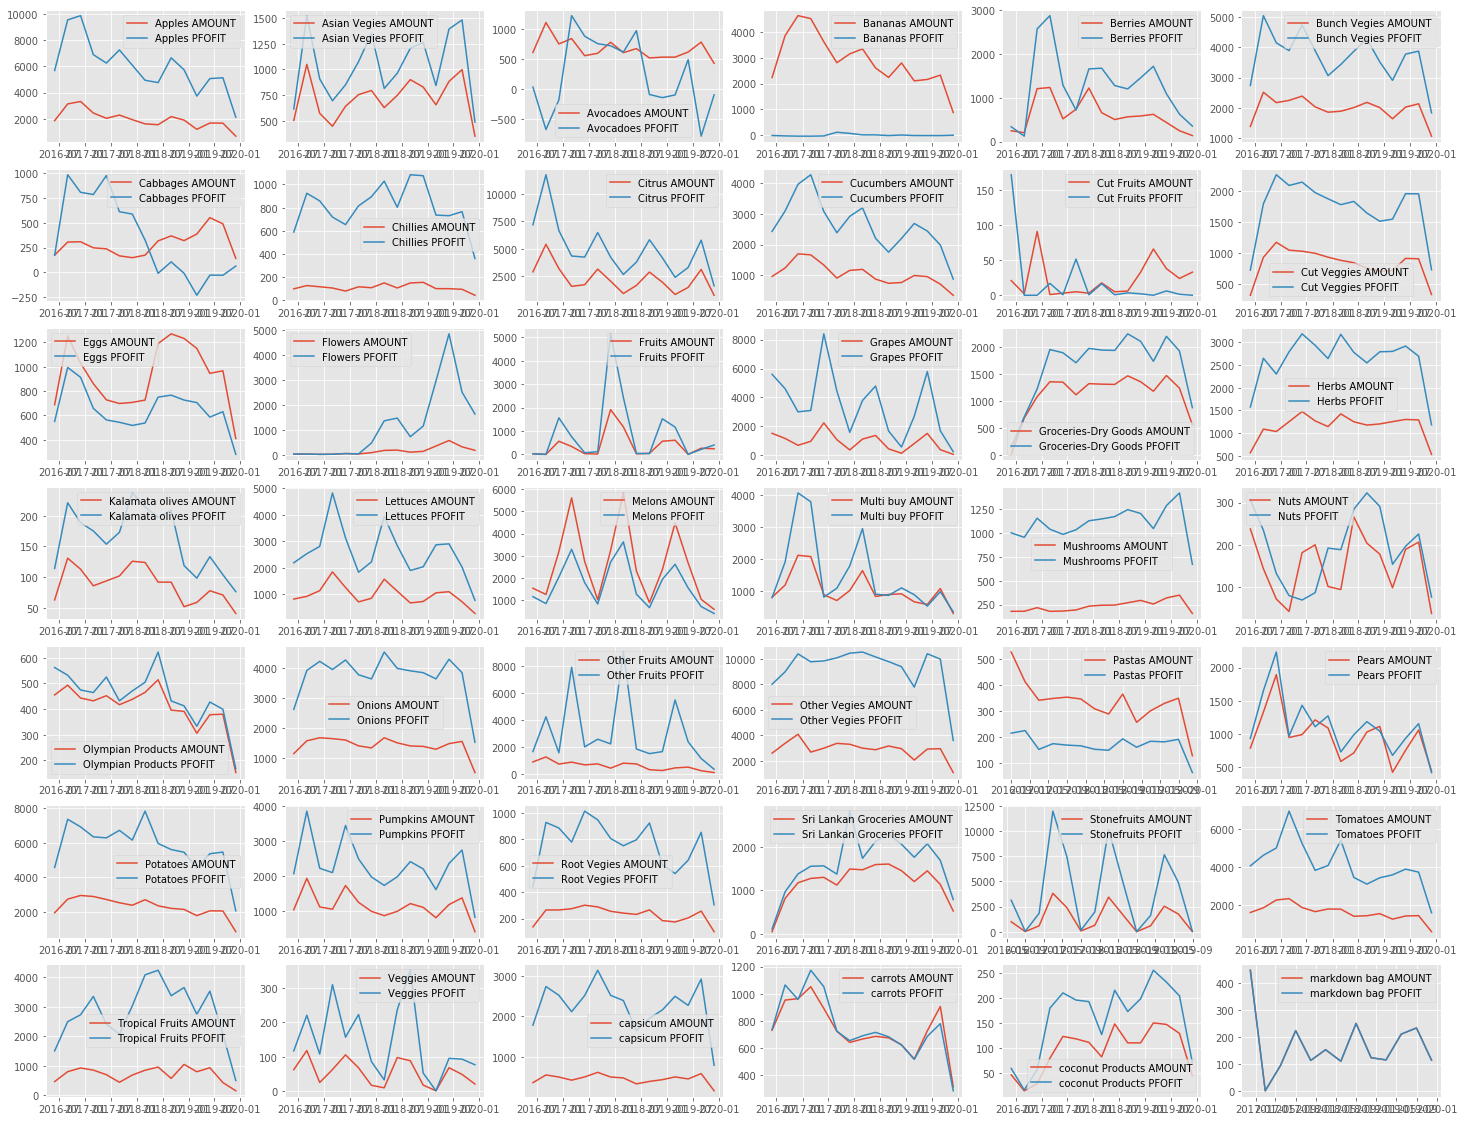

In [73]:
fig, axes = plt.subplots(7,6,figsize = (25,20))
for cat,ax in zip(cats, axes.flatten()):
    ax.plot(cat[1].resample('Q-NOV').sum()['UNITS'], label = cat[0]+' UNITS')
    ax.plot(cat[1].resample('Q-NOV').sum()['PROFIT'], label = cat[0]+' PFOFIT')
    
    ax.legend()

In [75]:
len(grodf.NAME.unique())

1266

In [79]:
grodf.PAYMENT.unique()

array(['cash', 'cashrefund', 'magcard', 'free'], dtype=object)

In [82]:
(grodf.PAYMENT=='free').sum()

50

Dont have a lot of sense to think about it

In [99]:
## drop previosly added column AMOUNT
grodf.drop(columns='AMOUNT',inplace = True)
grodf.columns


Index(['Unnamed: 0', 'TICKET', 'UNITS', 'REFERENCE', 'CODE', 'NAME',
       'UNIT_PRICEBUY', 'UNIT_PRICESELL', 'PAYMENT', 'TRANSID', 'CATEGORY',
       'TOTAL_PRICEBUY', 'TOTAL_PRICESELL', 'UNIT_PRICE_MARGIN', 'PROFIT'],
      dtype='object')

In [121]:
grodf.drop(columns='Unnamed: 0',inplace = True)
grodf.columns


Index(['TICKET', 'UNITS', 'REFERENCE', 'CODE', 'NAME', 'UNIT_PRICEBUY',
       'UNIT_PRICESELL', 'PAYMENT', 'TRANSID', 'CATEGORY', 'TOTAL_PRICEBUY',
       'TOTAL_PRICESELL', 'UNIT_PRICE_MARGIN', 'PROFIT'],
      dtype='object')

In [87]:
tradf = grodf.groupby('TICKET').sum()[['TOTAL_PRICESELL','TOTAL_PRICEBUY','PROFIT']]
tradf.head()

,TOTAL_PRICESELL,TOTAL_PRICEBUY,PROFIT
TICKET,,,
0000fbae-88c4-41ce-9f58-851a4595add4,18.294727,13.9500,4.344727
000178df-39b5-49b1-948f-92d1501c29d2,7.487120,0.0000,7.487120
0001c063-2d32-4380-9db6-de20c5b48f59,7.704360,7.2280,0.476360
0001c2b6-9d89-4355-84e3-41269c0e82e6,10.872660,4.3624,6.510260
0001cbed-b03b-43c8-8957-3bb40fcb33a6,3.317255,0.6380,2.679255


In [88]:
tradf.describe()

,TOTAL_PRICESELL,TOTAL_PRICEBUY,PROFIT
count,181970.000000,181970.000000,181970.000000
mean,10.457333,3.621603,6.835730
std,10.529195,4.919472,7.395398
min,-2.990000,-2.000000,-21.438000
25%,3.779495,0.500000,2.151000
50%,7.309410,2.156000,4.736220
75%,13.516080,4.835100,9.056330
max,321.107060,144.971800,259.480000


In [89]:
grodf.tail()

,Unnamed: 0,TICKET,UNITS,REFERENCE,CODE,NAME,UNIT_PRICEBUY,UNIT_PRICESELL,PAYMENT,TRANSID,CATEGORY,TOTAL_PRICEBUY,TOTAL_PRICESELL,UNIT_PRICE_MARGIN,PROFIT,AMOUNT
DATE,,,,,,,,,,,,,,,,
2019-10-13 17:41:45,659216,5cb041e2-1976-45b4-ba06-7779d6893156,1.000,3031,4.793000e+12,Curry powder250g kandyan,2.0,3.99,magcard,904210501806,Sri Lankan Groceries,2.000,3.99000,1.99,1.99000,1.000
2019-10-13 17:41:45,659217,5cb041e2-1976-45b4-ba06-7779d6893156,1.042,2010,2.010000e+03,Banana Cavendish,2.0,1.99,magcard,904210501806,Bananas,2.084,2.07358,-0.01,-0.01042,1.042
2019-10-13 17:41:45,659218,5cb041e2-1976-45b4-ba06-7779d6893156,1.000,1107,9.332102e+12,Tomatoes Cherry,0.0,3.00,magcard,904210501806,Tomatoes,0.000,3.00000,3.00,3.00000,1.000
2019-10-13 17:43:20,659219,8e1e8d7c-9247-44bc-b50e-dd01acb68974,0.382,1063,1.063000e+03,Onion brown,0.0,1.99,cash,no ID,Onions,0.000,0.76018,1.99,0.76018,0.382
2019-10-13 17:43:20,659220,8e1e8d7c-9247-44bc-b50e-dd01acb68974,2.000,5000,9.332769e+12,Eggs 700g,2.7,3.20,cash,no ID,Eggs,5.400,6.40000,0.50,1.00000,2.000


## Sales analysis

In [218]:
sample = grodf[:100]

In [227]:
sample.groupby('NAME').sum()[['UNITS','PROFIT']].sort_values(by = 'UNITS')[:1]

,UNITS,PROFIT
NAME,,
Chilli green,0.06,0.72


In [253]:
def sorting(df, cols = ['UNITS','PROFIT','TOTAL_PRICESELL'], by = 'UNITS', ascending = False):
    return df.groupby('NAME').sum()[cols].sort_values(by = by, ascending = ascending)[:1]

In [245]:
def grouping(df, cols = ['UNITS','PROFIT','TOTAL_PRICESELL']):
    return df.groupby('NAME').sum()[cols][:1]

In [235]:
sorting(sample)

,UNITS,PROFIT,TOTAL_PRICESELL
NAME,,,
Australian Asparagus green,8.112,5.6784,21.9024


In [237]:
sorting(grodf)

,UNITS,PROFIT,TOTAL_PRICESELL
NAME,,,
Banana Cavendish,43162.455,-431.62455,85893.28545


In [240]:
cat_mon = grodf.groupby(by =[pd.Grouper(freq = 'M'),'CATEGORY'])

In [247]:
mon_not_sort = cat_mon.apply(grouping)

In [248]:
mon_sort = cat_mon.apply(sorting)

In [260]:
mon_sort.head()

UNITS     PROFIT  \
DATE       CATEGORY     NAME                                             
2016-03-31 Apples       Apples Granny Smith          57.256  171.76800   
           Asian Vegies Okra                         17.946   29.43144   
           Avocadoes    Avocado Shepard             110.000  220.00000   
           Bananas      Banana Cavendish            334.524   -3.34524   
           Berries      Berries Strawberry (large)   49.000   23.03000   

                                                    TOTAL_PRICESELL  
DATE       CATEGORY     NAME                                         
2016-03-31 Apples       Apples Granny Smith               171.76800  
           Asian Vegies Okra                              179.28054  
           Avocadoes    Avocado Shepard                   220.00000  
           Bananas      Banana Cavendish                  665.70276  
           Berries      Berries Strawberry (large)        186.20000

NameError: name 'mon_sort' is not defined

In [ ]:
cols = ['UNITS','PROFIT','TOTAL_PRICESELL']

In [255]:
mon_sort_less = cat_mon.apply(sorting, cols=cols,by = 'UNITS', ascending = True)
mon_sort_less.head()

UNITS  TOTAL_PRICESELL  \
DATE       CATEGORY     NAME                                            
2016-03-31 Apples       Apple Jonathan         1.000          3.00000   
           Asian Vegies Bok choy               1.150          1.13850   
           Avocadoes    Avocado Hass Medium    9.000         17.91000   
           Bananas      Banana Cavendish     334.524        665.70276   
           Berries      Berries Raspberry      5.000         17.50000   

                                               PROFIT  
DATE       CATEGORY     NAME                           
2016-03-31 Apples       Apple Jonathan        1.00000  
           Asian Vegies Bok choy              1.13850  
           Avocadoes    Avocado Hass Medium  -9.09000  
           Bananas      Banana Cavendish     -3.34524  
           Berries      Berries Raspberry    17.50000

In [256]:
mon_sort_prof = cat_mon.apply(sorting, cols=cols,by = 'PROFIT', ascending = False)
mon_sort_prof_less = cat_mon.apply(sorting, cols=cols,by = 'PROFIT', ascending = True)


In [257]:
mon_sort_prof.head()

UNITS  TOTAL_PRICESELL  \
DATE       CATEGORY     NAME                                            
2016-03-31 Apples       Apples Granny Smith   57.256        171.76800   
           Asian Vegies Okra                  17.946        179.28054   
           Avocadoes    Avocado Shepard      110.000        220.00000   
           Bananas      Banana Cavendish     334.524        665.70276   
           Berries      Berries Blueberry      8.000         28.00000   

                                                PROFIT  
DATE       CATEGORY     NAME                            
2016-03-31 Apples       Apples Granny Smith  171.76800  
           Asian Vegies Okra                  29.43144  
           Avocadoes    Avocado Shepard      220.00000  
           Bananas      Banana Cavendish      -3.34524  
           Berries      Berries Blueberry     28.00000

In [258]:
mon_sort_prof_less.head()

UNITS  TOTAL_PRICESELL  \
DATE       CATEGORY     NAME                                                   
2016-03-31 Apples       Apple pink lady 1kg Punnet    2.000          7.98000   
           Asian Vegies bitter melon                  6.410         28.84500   
           Avocadoes    Avocado Hass Medium           9.000         17.91000   
           Bananas      Banana Cavendish            334.524        665.70276   
           Berries      Berries Raspberry             5.000         17.50000   

                                                      PROFIT  
DATE       CATEGORY     NAME                                  
2016-03-31 Apples       Apple pink lady 1kg Punnet   0.98000  
           Asian Vegies bitter melon                -3.20500  
           Avocadoes    Avocado Hass Medium         -9.09000  
           Bananas      Banana Cavendish            -3.34524  
           Berries      Berries Raspberry           17.50000

In [261]:
###Lets save most and least selling products to csv
mon_sort.to_csv('most_selling_by_unit.csv')
mon_sort_less.to_csv('least_selling_by_unit.csv')
mon_sort_prof.to_csv('most_selling_by_profit.csv')
mon_sort_prof_less.to_csv('least_selling_by_profit.csv')